# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
#from sklearn.grid_search import GridSearchCV
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.

#mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
#X, Y = mnist.data, mnist.target

# new location to load data set
X, Y = fetch_openml('mnist_784', return_X_y=True , cache=False)
Y = Y.astype(int)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print( 'data shape: ', X.shape)
print( 'label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

(100, 784)

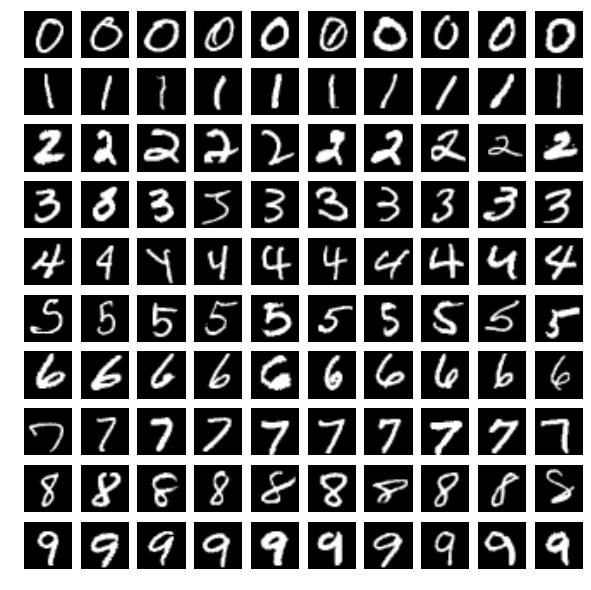

In [7]:
def P1(num_examples=10):

### STUDENT START ###
    
    num_types = np.unique(mini_train_labels) # find unique labels
    num_size = len(num_types) # find length of unique label
    digit_array = np.zeros((num_examples * num_size, mini_train_data.shape[1]))
    
    # for each unique digit, randomize the image in the dataset with the size of user input num_examples
    for i in range(num_size):
        subset = mini_train_data[mini_train_labels == i]
        #nonzero_index = np.flatnonzero(digit) # return indices that are non-zero
        #digit_random = np.random.choice(a = nonzero_index, size = num_examples, replace = False)
        shuffle = np.random.permutation(np.arange(subset.shape[0]))
        digit_array[i*num_examples : (i+1)*num_examples] = subset[shuffle][:num_examples]
 
    # plotting of 10 examples of each digit
    #fig, axes = plt.subplots(nrows=num_size,ncols=num_examples) # 10x10 grid
    plt.figure(figsize = (10,10))
    num_pixels_perside = 28
    n_rows = num_examples
    n_cols = num_size
    # Iterate through each example and plot each one
    for i, img_p1 in enumerate(digit_array):
        img_p1 = img_p1.reshape((num_pixels_perside, num_pixels_perside))
        plt.subplot(n_rows, n_cols, i+1)
        plt.axis('off')
        plt.imshow(img_p1, cmap='gray')
    
    return(digit_array.shape)

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###

    for k in k_values:
        knn = KNeighborsClassifier(k)
        knn.fit(mini_train_data, mini_train_labels)
        dev_predict = knn.predict(dev_data)
        dev_accuracy = knn.score(dev_data, dev_labels)
        
        # print report on dev set when k=1
        if (k == 1):
            knn_report = classification_report(dev_labels, dev_predict)
            print("Classification report for K-Nearest-Neighbors model when k = {}: \n".format(k) )
            print(knn_report)
            
        # print accuracy on dev set for all k
        print("Dev set accuracy when k = {}:".format(k), dev_accuracy*100, "%")


    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification report for K-Nearest-Neighbors model when k = 1: 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Dev set accuracy when k = 1: 88.4 %
Dev set accuracy when k = 3: 87.6 %
Dev set accuracy when k = 5: 88.2 %
Dev set accuracy when k = 7: 87.7 %
Dev set accuracy when k = 9: 87

ANSWER:
1. Digit "8" is the most difficult to interpret accurately, with lowest F1-score at 0.80.
2. KNN model has the highest accuracy at 88.4% when k=1 in predicting the correct digit in this development set.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [8]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    k2 = 1
    for train_i in train_sizes:
        knn2 = KNeighborsClassifier(k2)
        knn2.fit(train_data[0:train_i], train_labels[0:train_i])
        dev_accuracy2 = knn2.score(dev_data, dev_labels)
        accuracies.append(dev_accuracy2) # store accuracies into array needed by later section
        
        # measure time needed for prediction with each training size
        t0 = time.time()
        dev_predict2 = knn2.predict(dev_data)
        t1 = time.time()
        time_predict = t1 - t0
               
        # print accuracy on dev set for all k
        print("Dev set accuracy with train size = {} is {:.2f}".format(train_i, dev_accuracy2*100), "%")
        print("Prediction time with train size  = {} is {:.4f}".format(train_i, time_predict), "s")

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Dev set accuracy with train size = 100 is 70.20 %
Prediction time with train size  = 100 is 0.1270 s
Dev set accuracy with train size = 200 is 79.10 %
Prediction time with train size  = 200 is 0.2500 s
Dev set accuracy with train size = 400 is 81.10 %
Prediction time with train size  = 400 is 0.5560 s
Dev set accuracy with train size = 800 is 86.60 %
Prediction time with train size  = 800 is 1.1341 s
Dev set accuracy with train size = 1600 is 90.50 %
Prediction time with train size  = 1600 is 2.2811 s
Dev set accuracy with train size = 3200 is 92.70 %
Prediction time with train size  = 3200 is 4.6073 s
Dev set accuracy with train size = 6400 is 93.90 %
Prediction time with train size  = 6400 is 9.2185 s
Dev set accuracy with train size = 12800 is 95.20 %
Prediction time with train size  = 12800 is 18.8111 s
Dev set accuracy with train size = 25000 is 96.20 %
Prediction time with train size  = 25000 is 37.1931 s


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Prediction accuracy of n = 60000 is [1.24469234]
Prediction accuracy of log n = 60000 is [0.28940022]
Prediction accuracy of logit n = 60000 is [6.27909427]


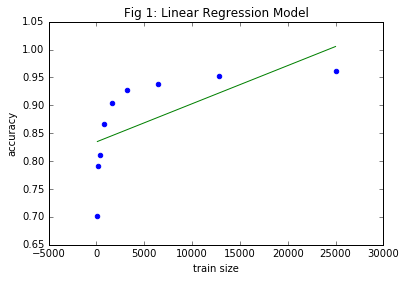

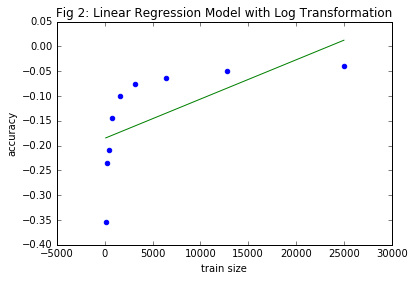

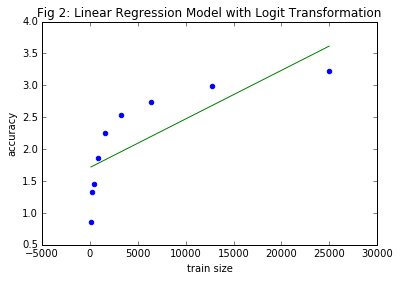

In [9]:
def P4(train_sizes):

### STUDENT START ###
    n = 60000    
    t_train_sizes = np.array(train_sizes).reshape(len(train_sizes),1)
    t_accuracy = np.array(accuracies)
    
    # linear regression model
    regress = LinearRegression()
    regress.fit(t_train_sizes, t_accuracy)
    regress_predict = regress.predict(t_train_sizes)
    
    # predict for n=60000
    regress_60k = regress.predict(np.array(60000).reshape(1,1))
    print("Prediction accuracy of n = 60000 is {}".format(regress_60k))
    
    #print(regress_predict)
    
    
    # Log transformation for new prediction
    
    def logit_transform(p):
        return np.log(p/(1-p))

    # this is log transform
    log_train_sizes = np.log(t_train_sizes)
    log_accuracies = np.log(t_accuracy)
    log_regress = LinearRegression()
    log_regress.fit(t_train_sizes, log_accuracies)
    log_regress_predict = log_regress.predict(t_train_sizes)
    log_regress_60k = log_regress.predict(np.array(60000).reshape(1,1))
    print("Prediction accuracy of log n = 60000 is {}".format(log_regress_60k))
    
    # this is logit transform
    logit_accuracies = logit_transform(t_accuracy)
    logit_regress = LinearRegression()
    logit_regress.fit(t_train_sizes, logit_accuracies)
    logit_regress_predict = logit_regress.predict(t_train_sizes)
    logit_regress_60k = logit_regress.predict(np.array(60000).reshape(1,1))
    print("Prediction accuracy of logit n = 60000 is {}".format(logit_regress_60k))
    
    #return(regress_predict)
    
    # Plots
    plt.figure(1)
    plt.scatter(t_train_sizes, accuracies, color='blue')
    plt.xlabel('train size')
    plt.ylabel('accuracy')
    plt.title('Fig 1: Linear Regression Model')
    plt.plot(t_train_sizes,regress_predict, color='green')
    
    plt.figure(2)
    plt.scatter(t_train_sizes, log_accuracies, color='blue')
    plt.xlabel('train size')
    plt.ylabel('accuracy')
    plt.title('Fig 2: Linear Regression Model with Log Transformation')
    plt.plot(t_train_sizes, log_regress_predict, color='green')   
  
    plt.figure(3)
    plt.scatter(t_train_sizes, logit_accuracies, color='blue')
    plt.xlabel('train size')
    plt.ylabel('accuracy')
    plt.title('Fig 2: Linear Regression Model with Logit Transformation')
    plt.plot(t_train_sizes, logit_regress_predict, color='green')  

### STUDENT END ###

P4(train_sizes)

ANSWER: The regression model predicts 1.245 when n = 60000. This prediction is invalid as the accuracy is bounded by [0,1]. From figure 1, linear regression model approaches 1 and will not fit well for larger training size due to non-linearity between accuracy and training size. Therefore, log transformation would be required as shown in figure 2 for better linearity.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [7]:
def P5(k):

### STUDENT START ###
    knn5 = KNeighborsClassifier(k)
    dev_predict5 = knn5.fit(mini_train_data, mini_train_labels).predict(dev_data)
    
    y_true = dev_labels
    y_pred = dev_predict5
    cnf_matrix = confusion_matrix(y_true, y_pred)
    print(cnf_matrix)

    # find confusing pairs
    # from the confusion matrix, most confused pair is [4,9]
    # plot the digits
    
    
    
    
### STUDENT END ###
k5 = 1
P5(k5)

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [10]:
def P6():
    
### STUDENT START ###
    
    # take '5' is our main pixel, and other neighboring digits are the ones to be weighted on
    # 1    2    3
    # 4   [5]   6
    # 7    8    9
    
    def blur_filter(img, blur_scale=0.5):
        max_pixels = X.shape[1]
        pixel_side = int(np.sqrt(max_pixels))  
        img = img.reshape(pixel_side, pixel_side)
        filtered_img = np.zeros(img.shape)
       
        
        ## performing gaussian blur using 8 neighboring pixels. set pixels on 4 edges to be zeroes.
        for i in range(pixel_side):  # row
            for j in range(pixel_side):  # column
                p1 = 0 if (i==0 or j==0) else img[i-1][j-1]
                p2 = 0 if (i==0) else img[i-1][j]
                p3 = 0 if (i==0 or j==27) else img[i-1][j+1]
                p4 = 0 if (j==0) else img[i][j-1]
                p5 = img[i][j] 
                p6 = 0 if (j==27) else img[i][j+1]
                p7 = 0 if (i==27 or j==0) else img[i+1][j-1]
                p8 = 0 if (j==27) else img[i+1][j]
                p9 = 0 if (i==27 or j==27) else img[i+1][j+1]
                
        # calculate for weighted average
        filtered_img = blur_scale*p5 + (1-blur_scale)*np.mean(p1,p2,p3,p4,p6,p7,p8,p9)
        
        
        return (filtered_img)

    # 1: preprocess the training data but not the dev data
    
    
    
    # 2: preprocess the dev data but not the training data
    
    
    
    # 3: preprocess both training and dev data

    #blur_filter(mini_train_data)
    
    return(1)
### STUDENT END ###

P6()

1

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [17]:
def P7():

### STUDENT START ###

    def bucketting(raw_data, thresh1, thresh2):
        bucket_data = []
        for count in raw_data:
            if count > thresh2:
                bucket_data.append(2)
            elif (count <= thresh2 and count > thresh1):
                bucket_data.append(1)
            else:
                bucket_data.append(0)
        return(bucket_data)
            
            

    def func_bernoulli(alpha = 1, binarize = 0.5):
        model_bernoulli = BernoulliNB(alpha = 1, binarize = 0.5)
        model_bernoulli.fit(train_data, train_labels).predict(dev_data)
        print("Bernoulli: ", model_bernoulli.score(dev_data, dev_labels))
        
        
    def func_multinomial():
        multi_data = [bucketting(train_dataset, 0.2, 0.8) for train_dataset in mini_train_data]
        model_multi = MultinomialNB()
        model_multi.fit(multi_data, mini_train_labels).predict(dev_data)
        print("Multinomial: ", model_multi.score(dev_data, dev_labels))

    
### STUDENT END ###
    func_bernoulli()
    func_multinomial()
    
P7()

Bernoulli:  0.827
Multinomial:  0.814


ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [21]:
def P8(alphas):

### STUDENT START ###

# GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=’warn’)
    model_bernoulli = BernoulliNB(alpha = 1, binarize = 0.5)
    grid_search = GridSearchCV(estimator = model_bernoulli, param_grid = alphas)
    grid_search.fit(train_data, train_labels)
    
    return(grid_search)

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

c:\users\a0137361\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\a0137361\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\a0137361\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\a0137361\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\a0137361\appdata\local\c

In [19]:
print(nb.best_params_)
print(nb.best_score_)
print(nb.score)


{'alpha': 0.0}
0.8380166666666666
<bound method BaseSearchCV.score of GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=BernoulliNB(alpha=1, binarize=0.5, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>


ANSWER:
    Best value for alpha when using GridSearchCV is 0.001. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [27]:
def P9():

### STUDENT START ###
    model_gaussian = GaussianNB()
    model_gaussian.fit(train_data, train_labels)
    model_gaussian.predict(dev_data)
    print("Gaussian mean = ", round(np.mean(model_gaussian.theta_),5))
    print("Gaussian variance = ", round(np.mean(model_gaussian.sigma_),5))
    gaussian_acc = model_gaussian.score(dev_data, dev_labels)
    print("Gaussian accuracy = {acc1} %".format(acc1 = gaussian_acc*100))

    # adding smoothing in gaussian model
    # model_gaussian = GaussianNB(var_smoothing = 0.7)
    
    # Process training data 
    # Draw random samples from a normal (Gaussian) distribution and add as noise to mini training data
    #noisy_train_data = mini_train_data + np.random.normal(loc = 0.0, scale= 0.1, size = 28*28) 
    noisy_train_data = train_data + np.random.uniform(size = train_data.shape) 
    noisy_dev_data = dev_data + np.random.uniform(size = dev_data.shape) 
    processed_gaussian = GaussianNB()
    processed_gaussian.fit(noisy_train_data, train_labels)
    processed_gaussian.predict(noisy_dev_data)
    processed_gaussian_acc = processed_gaussian.score(noisy_dev_data, dev_labels)
    print("Processed Gaussian accuracy = {acc2} %".format(acc2 = processed_gaussian_acc*100))
    
    
### STUDENT END ###

gnb = P9()
#gnb

Gaussian mean =  0.13168
Gaussian variance =  0.05364
Gaussian accuracy = 58.599999999999994 %
Processed Gaussian accuracy = 82.69999999999999 %


ANSWER: 
    The accuracy of GaussianNB model is comparatively low at 59.3%. This is due to the nature of data set where most of the data are close to 0 from the mean and variance measurement. GaussianNB model requires data to be normal. Therefore, some random noise were added to both the training and development data set to increase the model accuracy. The updated GaussianNB model is able to achieve close to 81% accuracy, which is similar to BernoulliNB model.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

(784,)


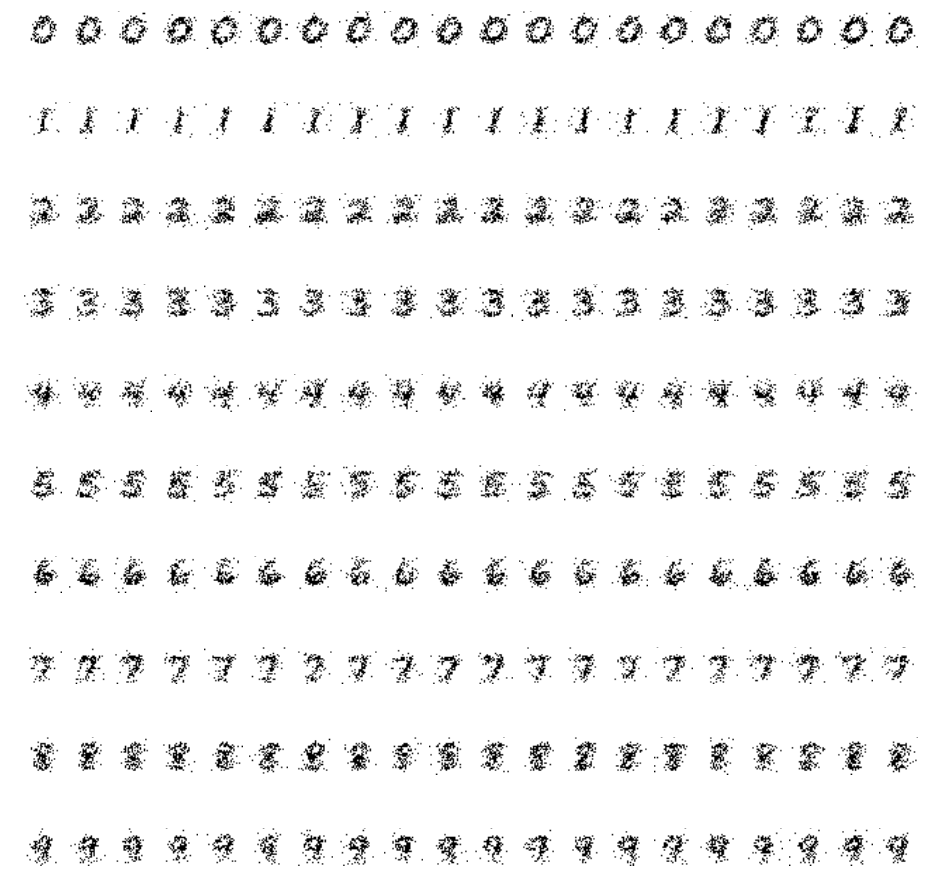

In [15]:
def P10(num_examples):

### STUDENT START ###

    p10_model = BernoulliNB(alpha = 1, binarize = 0.5)
    p10_model.fit(mini_train_data, mini_train_labels)
    p10_log_data = np.exp(p10_model.feature_log_prob_) # convert log probability back to normal probability
    print(p10_log_data[1].shape)
  
    
    # generate 10x20 grid of digits and plot
    p10_digit = 10
    plt.figure(figsize = (16,16))

    for i in range(p10_digit):
        for j in range(num_examples):
            plot_number = i * num_examples + (j+1)
            # compare estimated probability of pixel with random numbers and return true if its higher
            img10 = p10_log_data[i] > np.random.rand(28*28) 
            img10 = img10.reshape(28,28)

            plt.subplot(p10_digit, num_examples, plot_number)
            plt.axis('off')
            plt.imshow(img10, cmap='gray_r')
                 
            
### STUDENT END ###

P10(20)

ANSWER: The generated digits from BernoulliNB is comparatively blurry as compared to training digits. The generative model tends to produce more noise that could obscure its visibility.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [37]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    alpha = 1 # alpha 0 for no smoothing
    binarize = 0.5
    p11_model = BernoulliNB(alpha, binarize)
    p11_model.fit(mini_train_data, mini_train_labels)
    p11_prediction = p11_model.predict(dev_data)
    p11_probs = p11_model.predict_proba(dev_data)
    p11_score = p11_model.score(dev_data, dev_labels)
   # print(p11_probs[1])
    #print(len(p11_prediction))
    
    bin_count = len(buckets)
    #pred_size = p11_prediction.shape
    for i in range(len(p11_prediction)):
        for j in p11_prediction:
            max_prob = np.max(p11_probs[i])
            bucket_index = sum(max_prob > buckets)
            correct[bucket_index] += 1 if j == dev_labels[i] else 0
            total[bucket_index] += 1
        
    

    return(correct,total)
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total = 1000    accuracy = 0.101
p(pred) <= 0.9000000000000    total = 47000    accuracy = 0.095
p(pred) <= 0.9990000000000    total = 106000    accuracy = 0.096
p(pred) <= 0.9999900000000    total = 75000    accuracy = 0.096
p(pred) <= 0.9999999000000    total = 80000    accuracy = 0.097
p(pred) <= 0.9999999990000    total = 71000    accuracy = 0.097
p(pred) <= 0.9999999999900    total = 74000    accuracy = 0.097
p(pred) <= 0.9999999999999    total = 70000    accuracy = 0.098
p(pred) <= 1.0000000000000    total = 476000    accuracy = 0.106


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()